In [1]:
%run EUVIP_1_defaults.ipynb

Range of spatial frequencies:  [ 0.618   0.382   0.2361  0.1459  0.0902  0.0557  0.0344  0.0213]
Range of angles (in degrees):  [-82.5 -75.  -67.5 -60.  -52.5 -45.  -37.5 -30.  -22.5 -15.   -7.5   0.
   7.5  15.   22.5  30.   37.5  45.   52.5  60.   67.5  75.   82.5  90. ]
Final sparseness in the representation = 0.0026041666666666665
Final sparseness in the pyramid = 0.375


In [2]:
%cd -q ../test/

## DropLets as a sparse MotionCloud

We previously saw one way of doing a sparse motion cloud : generate a sparse matrix, then convolve it with the texton. This was with binary mask. Let's now try with a power-law distribution on the coefficients.


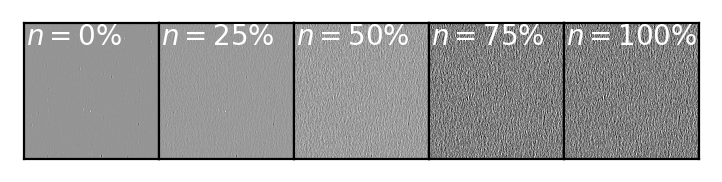

In [3]:
import numpy as np
import MotionClouds as mc
import matplotlib.pyplot as plt
N_noise = 5
a = 1.5
noises =  np.linspace(0., 1., N_noise, endpoint=True)

N_X, N_Y, N_frame = 512, 512, 1
fx, fy, ft = mc.get_grids(N_X, N_Y, 1)
seed = 2018
np.random.seed(seed=seed)
#phi = np.exp(1j * 2 * np.pi * np.random.rand(N_X, N_Y, N_frame))
phi = 25*np.sign(np.random.randn(N_X, N_Y, N_frame))
s = np.random.pareto(a=a, size=(N_X, N_Y, N_frame)) + 1
s /= s.max()
s *= phi
# phi = np.exp(1j * 2 * np.pi * np.random.rand(N_X, N_Y, N_frame))
n = np.random.randn(N_X, N_Y, N_frame)

fig, axs = plt.subplots(1, N_noise, figsize=(fig_width, fig_width/N_noise))
for i_ax, noise in enumerate(noises):

    mc_i = mc.envelope_gabor(fx, fy, ft, B_theta=np.inf)
    im = mc.random_cloud(mc_i, events=noise*n+(1-noise)*s)
                
    axs[i_ax].imshow(mc.rectif(im[:, :, 0]), cmap=plt.gray())
    axs[i_ax].text(9, 80, r'$n=%.0f\%%$' % (noise*100), color='white', fontsize=10)
    axs[i_ax].set_xticks([])
    axs[i_ax].set_yticks([])
plt.tight_layout()
fig.subplots_adjust(hspace = .0, wspace = .0, left=0.0, bottom=0., right=1., top=1.)
#fig.savefig(os.path.join(figpath, experiment + '_droplets' + ext))

[ 0.      0.0001  0.0022  0.0473  1.    ]


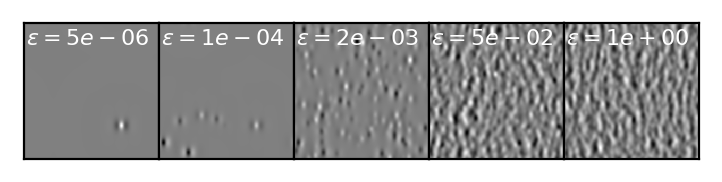

In [4]:
import numpy as np
import MotionClouds as mc
import matplotlib.pyplot as plt

# PARAMETERS
seed = 2042
np.random.seed(seed=seed)
N_sparse = 5
sparse_base = 2.e5
sparseness =  np.logspace(-1, 0, N_sparse, base=sparse_base, endpoint=True)
print(sparseness)

# TEXTON
N_X, N_Y, N_frame = 256, 256, 1
fx, fy, ft = mc.get_grids(N_X, N_Y, 1)
mc_i = mc.envelope_gabor(fx, fy, ft, sf_0=0.05, B_sf=0.025, B_theta=np.inf)
#print(ft.shape)
#print(mc_i.shape)
#fig, axs = plt.subplots(1, 1, figsize=(fig_width, fig_width))
#axs.imshow(mc.envelope_speed(fx, fy, ft)[:, :, 0], vmin=-1, vmax=1, cmap=plt.gray())

#texton = 2*mc.rectif(mc.random_cloud(mc_i, impulse=True))-1
#fig, axs = plt.subplots(1, 1, figsize=(fig_width, fig_width))
#axs.imshow(texton[:, :, 0], vmin=-1, vmax=1, cmap=plt.gray())

values = np.random.randn(N_X, N_Y, N_frame)
#a = 2.
#values = np.random.pareto(a=a, size=(N_X, N_Y, N_frame)) + 1
#values *= np.sign(np.random.randn(N_X, N_Y, N_frame))

#chance = np.random.rand(N_X, N_Y, N_frame)
chance = np.argsort(-np.abs(values.ravel()))
#fig, axs = plt.subplots(1, 1, figsize=(fig_width, fig_width))
#axs.plot(np.abs(values.ravel())[chance])
chance = np.array(chance, dtype=np.float)
chance /= chance.max()
chance = chance.reshape((N_X, N_Y, N_frame))
#print(chance.min(), chance.max())
#fig, axs = plt.subplots(1, 1, figsize=(fig_width, fig_width))
#axs.imshow(chance[:, :, 0], vmin=0, vmax=1, cmap=plt.gray())

fig, axs = plt.subplots(1, N_sparse, figsize=(fig_width, fig_width/N_sparse))
for i_ax, l0_norm in enumerate(sparseness):

    threshold = 1 - l0_norm
    mask = np.zeros_like(chance)
    mask[chance > threshold] = 1.
    
    im = 2*mc.rectif(mc.random_cloud(mc_i, events=mask*values))-1
                
    axs[i_ax].imshow(im[:, :, 0], vmin=-1, vmax=1, cmap=plt.gray())
    #axs[i_ax].text(9, 80, r'$n=%.0f\%%$' % (noise*100), color='white', fontsize=10)
    axs[i_ax].text(4, 40, r'$\epsilon=%.0e$' % l0_norm, color='white', fontsize=8)
    axs[i_ax].set_xticks([])
    axs[i_ax].set_yticks([])
plt.tight_layout()
fig.subplots_adjust(hspace = .0, wspace = .0, left=0.0, bottom=0., right=1., top=1.)
mp.savefig(fig,  experiment + '_droplets')

## applying to the texture function

In [5]:
N_edge = 128

In [6]:
frames =[]
for a in sparseness:
    frames.append(mp.texture(N_edge=N_edge, a=a, randn=False))

/Users/lolo/pool/science/BICV/SparseEdges/SparseEdges/SparseEdges.py:126: RuntimeWarning: invalid value encountered in multiply
  sf_0=edges[3, i_edge], B_sf=self.pe.B_sf,


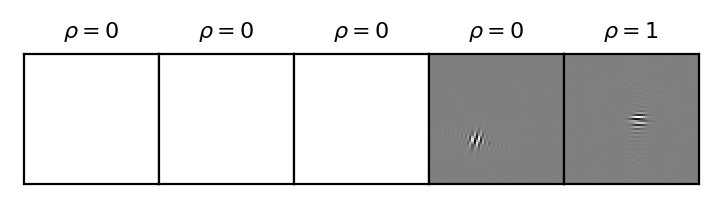

In [7]:
fig, axs = plt.subplots(1, N_sparse, sharex=True, sharey=True)
fig.set_size_inches(fig_width, 1.2*fig_width/N_sparse)
for i_sparse in range( N_sparse):
    vmax=np.abs(frames[i_sparse]).max()
    vmin=-vmax
    axs[i_sparse].imshow(frames[i_sparse], origin='lower', cmap='gray', vmin=vmin, vmax=vmax, interpolation='none')
    axs[i_sparse].axis('tight')
    axs[i_sparse].set_xticks([])
    axs[i_sparse].set_yticks([])
    axs[i_sparse].set_title(label = r'$\rho=%.0f$' % sparseness[i_sparse], fontdict={'fontsize':8})

fig.tight_layout()
fig.subplots_adjust(left=0, bottom=0, right=1, top=.8, wspace=0, hspace=0)   

mp.savefig(fig, experiment + '_droplets_tex')

The following will be useful for the experiments

## modeling different sparseness exponents in a natural image

In [8]:
!ls data_cache/*.npy

data_cache/EUVIP-lena.npy     data_cache/EUVIP_lena.npy
data_cache/EUVIP-lena_rec.npy data_cache/EUVIP_lena_rec.npy


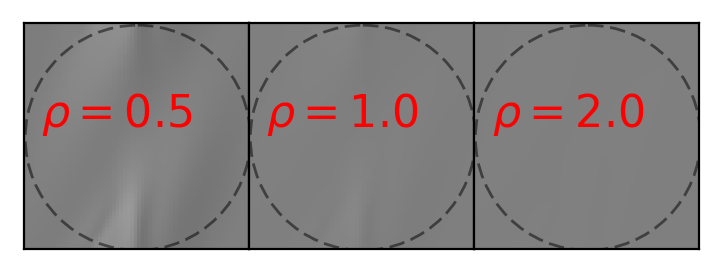

In [9]:
name = experiment.replace('sparseness', 'lena')
matname = os.path.join(mp.pe.matpath, name + '.npy')
N_rho = 3
fig, axs = plt.subplots(1, N_rho, figsize=(fig_width, fig_width/N_rho))
vmax = 1.
for i_ax, rho in enumerate(np.logspace(-1, 1, N_rho, base=2)):
    edges = np.load(matname)
    edges[4, :] = edges[4, :] ** rho
    image_rec = mp.dewhitening(mp.reconstruct(edges, mask=True))      
    fig, axs[i_ax] = mp.imshow(image_rec/vmax, fig=fig, ax=axs[i_ax], norm=False, mask=True)
    axs[i_ax].text(5, 29, r'$\rho=%.1f$' % rho, color='red', fontsize=16)
plt.tight_layout()
fig.subplots_adjust(hspace = .0, wspace = .0, left=0.0, bottom=0., right=1., top=1.)

mp.savefig(fig, name + '_rescale')

In [10]:
%cd -q ../notebooks/